In [1]:
import string
from collections import Counter
import warnings

import nltk
from nltk.corpus import stopwords

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    confusion_matrix,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Suppress warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [2]:
df = pd.read_csv("financial_sentiment_data.csv")
df_final = df.copy()
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [3]:
df_final.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.shape

(5842, 2)

In [5]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
# Drop rows with NaN values in the 'Sentence' column
df = df.dropna(subset=['Sentence'])
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [8]:
duplicated_sentence =df["Sentence"].duplicated().sum()
duplicated_sentence

520

In [9]:
df = df.drop_duplicates(subset="Sentence")

In [10]:
df.shape

(5322, 2)

#EDA

In [11]:
df['word_counts'] = df['Sentence'].apply(lambda x: len(str(x).strip().split(' ')))
df[['Sentence','word_counts']]

,Sentence,word_counts
0,The GeoSolutions technology will leverage Bene...,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",11
2,"For the last quarter of 2010 , Componenta 's n...",39
3,According to the Finnish-Russian Chamber of Co...,20
4,The Swedish buyout firm has sold its remaining...,23
...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,10
5836,Daily Mail parent company in talks with potent...,18
5838,Nordic Walking was first used as a summer trai...,14
5839,"According shipping company Viking Line , the E...",16


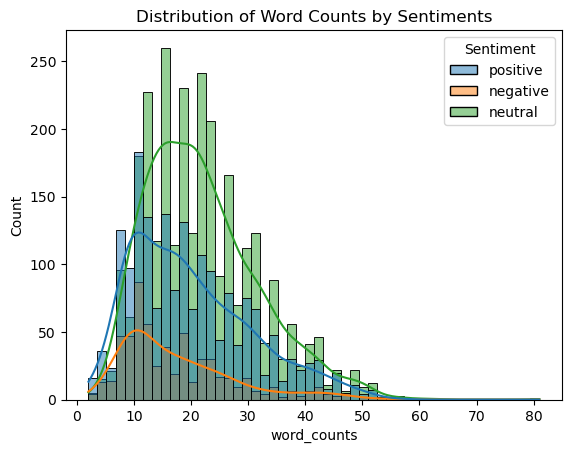

In [12]:
sns.histplot(data=df, x='word_counts', hue='Sentiment', kde=True)
plt.title('Distribution of Word Counts by Sentiments')
plt.show()


<Axes: xlabel='Sentiment', ylabel='count'>

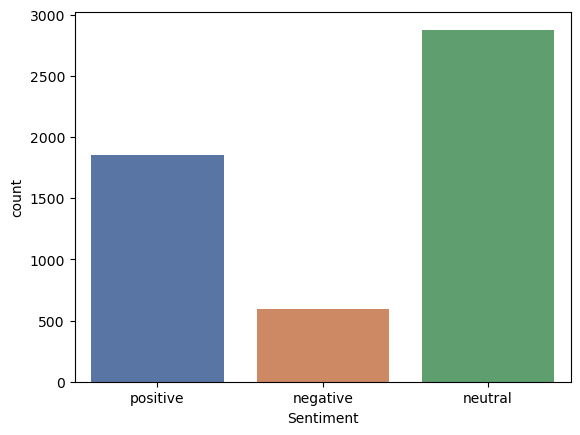

In [13]:
sns.countplot(data = df, x = 'Sentiment', palette = 'deep')

**Word Cloud**

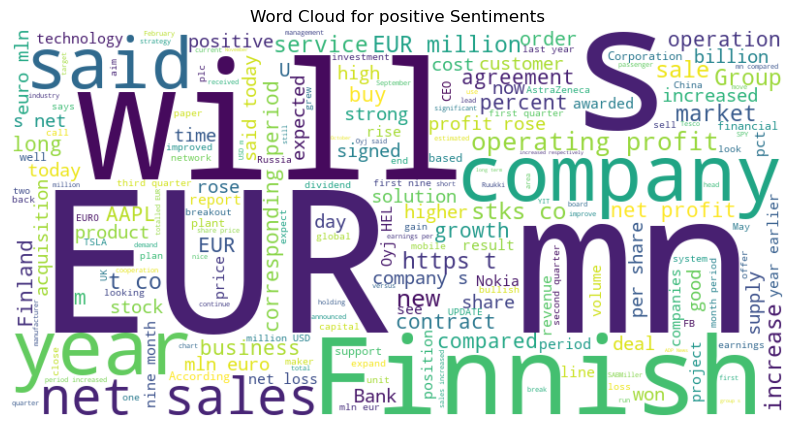

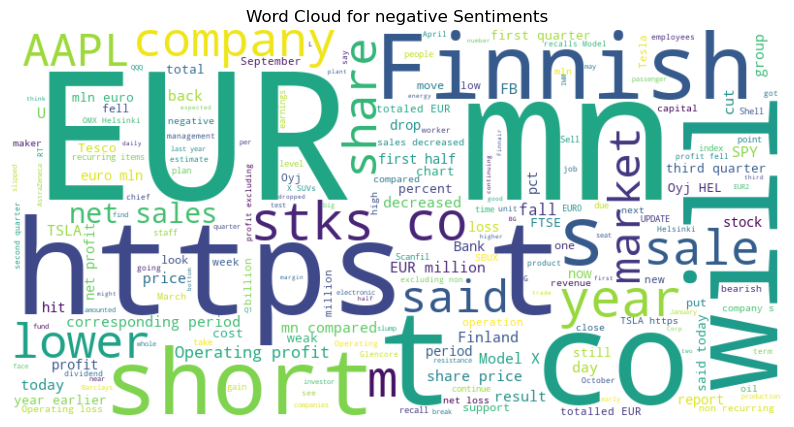

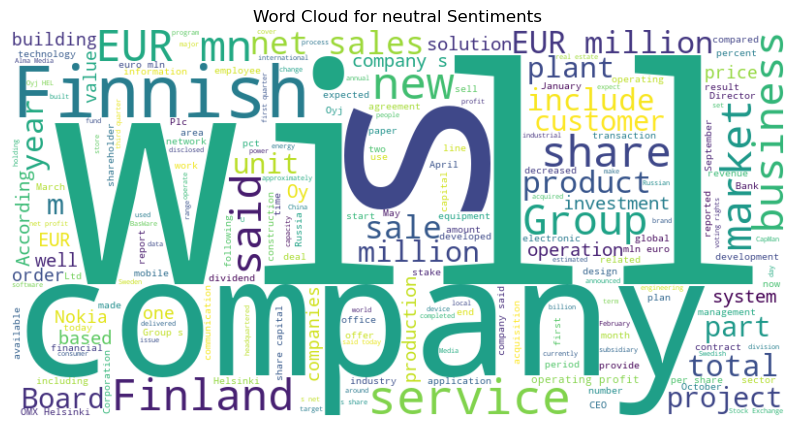

In [14]:
for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment]
    text = ' '.join(subset['Sentence'])
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiments')
    plt.show()


**Stop Words**

In [15]:
stop = stopwords.words('english')
df['stop_words'] = df['Sentence'].apply(lambda x : len([x for x in x.split() if x in stop]))

df[['Sentence','stop_words']].head(10)

,Sentence,stop_words
0,The GeoSolutions technology will leverage Bene...,6
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",4
2,"For the last quarter of 2010 , Componenta 's n...",15
3,According to the Finnish-Russian Chamber of Co...,8
4,The Swedish buyout firm has sold its remaining...,5
5,$SPY wouldn't be surprised to see a green close,4
6,Shell's $70 Billion BG Deal Meets Shareholder ...,0
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,7
8,Kone 's net sales rose by some 14 % year-on-ye...,5
9,The Stockmann department store will have a tot...,13


**The Most Common Words in the Sentences for each Sentiment Class**

In [16]:
sentiment_words = {}

for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment]
    text = ' '.join(subset['Sentence'])


    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()


    words = [word for word in words if word.lower() not in stop]

    word_freq = Counter(words)
    sentiment_words[sentiment] = word_freq.most_common(10)

for sentiment, words in sentiment_words.items():
    print(f'Most common words in {sentiment} sentiment (without stopwords and punctuation): {words}')


Most common words in positive sentiment (without stopwords and punctuation): [('EUR', 384), ('mn', 239), ('sales', 197), ('company', 191), ('said', 190), ('profit', 187), ('Finnish', 177), ('net', 175), ('million', 162), ('year', 143)]
Most common words in negative sentiment (without stopwords and punctuation): [('EUR', 137), ('mn', 115), ('profit', 67), ('sales', 56), ('Finnish', 44), ('net', 41), ('2009', 41), ('said', 39), ('year', 37), ('quarter', 37)]
Most common words in neutral sentiment (without stopwords and punctuation): [('company', 459), ('EUR', 369), ('million', 224), ('said', 218), ('Finnish', 217), ('Finland', 204), ('sales', 181), ('shares', 161), ('mn', 155), ('2008', 148)]


Plotting those above Most Common Words

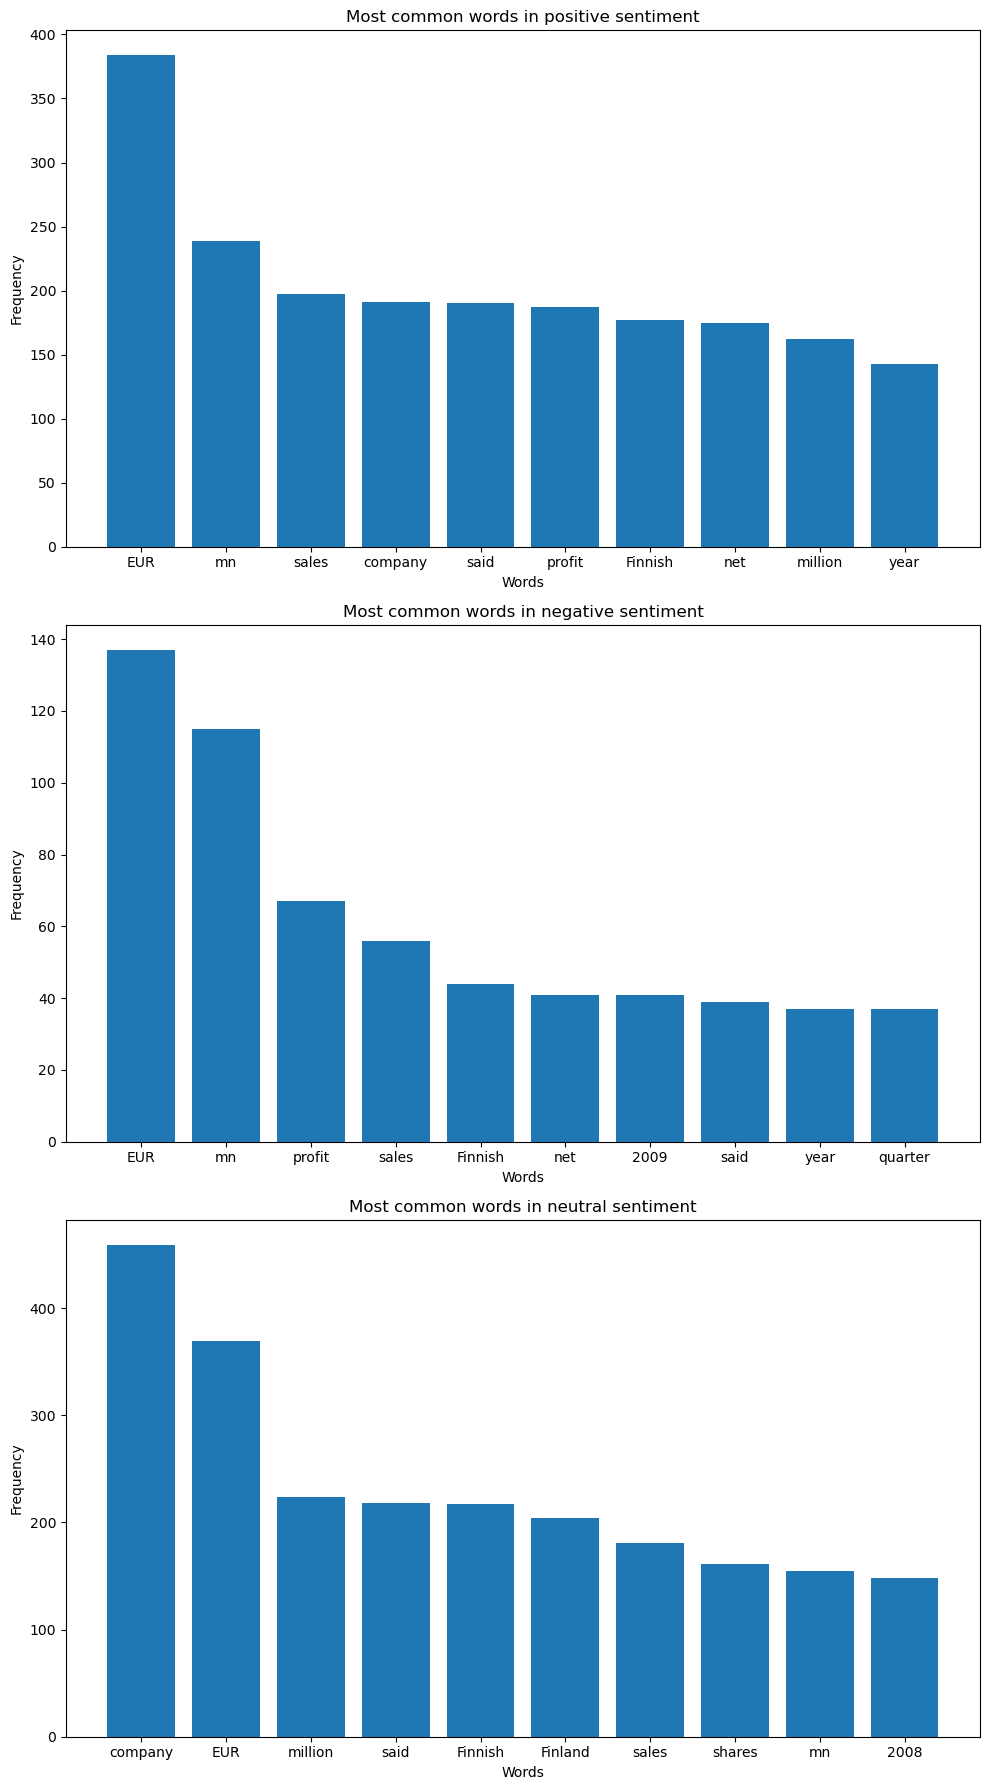

In [17]:
# Plotting
fig, axes = plt.subplots(nrows=len(sentiment_words), figsize=(10, 6 * len(sentiment_words)))

for idx, (sentiment, words) in enumerate(sentiment_words.items()):
    ax = axes[idx]
    ax.bar([word[0] for word in words], [count[1] for count in words])
    ax.set_title(f'Most common words in {sentiment} sentiment')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

UNIQUE WORD COUNTS


*This can help identify the diversity of vocabulary used in different sentiments.

In [18]:
import pandas as pd

# Tokenize the sentences into words
df['tokenized_words'] = df['Sentence'].apply(lambda x: x.split())

# Calculate the number of unique words in each sentence
df['unique_word_count'] = df['tokenized_words'].apply(lambda x: len(set(x)))

# Display the DataFrame with the new column
print(df[['Sentence', 'unique_word_count']])


                                               Sentence  unique_word_count
0     The GeoSolutions technology will leverage Bene...                 29
1     $ESI on lows, down $1.50 to $2.50 BK a real po...                 11
2     For the last quarter of 2010 , Componenta 's n...                 31
3     According to the Finnish-Russian Chamber of Co...                 18
4     The Swedish buyout firm has sold its remaining...                 23
...                                                 ...                ...
5835  HSBC Says Unit to Book $585 Million Charge on ...                 10
5836  Daily Mail parent company in talks with potent...                 18
5838  Nordic Walking was first used as a summer trai...                 14
5839  According shipping company Viking Line , the E...                 16
5841  HELSINKI AFX - KCI Konecranes said it has won ...                 27

[5322 rows x 2 columns]


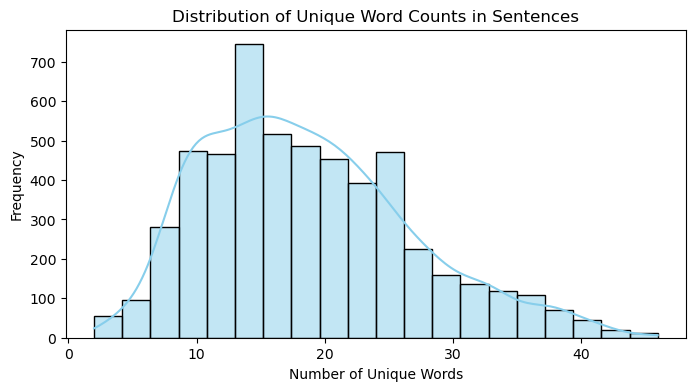

In [19]:
#HISTOGRAM FOR VISUAL REPRESENTATION OF ABOVE CODE

# Set up the figure and axes
plt.figure(figsize=(8, 4))

# Plot a histogram of unique word counts
sns.histplot(df['unique_word_count'], bins=20, kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Word Counts in Sentences')

# Show the plot
plt.show()


N GRAMS ANALYSIS

In [20]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation and char.isalnum() or char.isspace()])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Tokenize and preprocess the sentences into words
df['tokenized_words'] = df['Sentence'].apply(preprocess_text)

# Extract unigrams 
df['unigrams'] = df['tokenized_words'].apply(lambda x: list(ngrams(x, 1)))

# Flatten the list of unigrams
all_unigrams = [unigram for sentence_unigrams in df['unigrams'] for unigram in sentence_unigrams]

# Convert the results to a DataFrame for visualization
unigrams_df = pd.DataFrame(all_unigrams, columns=['Word1'])

# Display the most common unigrams
common_unigrams = unigrams_df['Word1'].value_counts().reset_index().rename(columns={'index': 'Word1', 'Word1': 'Frequency'})
print(common_unigrams.head(10))



  Frequency  count
0       eur    973
1   company    730
2        mn    509
3     sales    471
4      said    452
5   finnish    438
6   million    419
7    profit    418
8       net    400
9     group    295


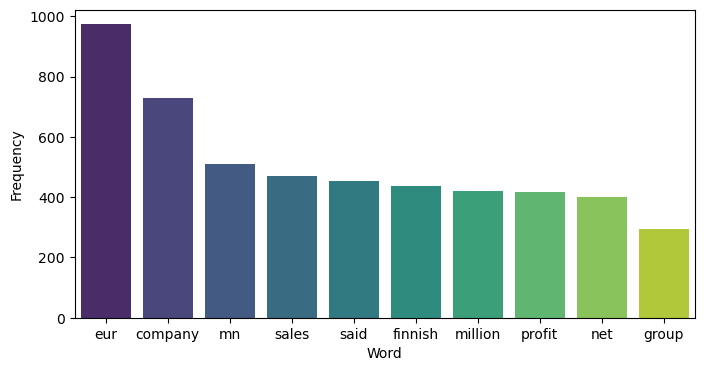

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Frequency', y='count', data=common_unigrams.head(10), palette='viridis')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


TOP 10 BIGRAMS(N-GRAMS ANALYSIS)

In [22]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation and char.isalnum() or char.isspace()])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Tokenize and preprocess the sentences into words
df['tokenized_words'] = df['Sentence'].apply(preprocess_text)

# Extract bigrams 
df['bigrams'] = df['tokenized_words'].apply(lambda x: list(ngrams(x, 2)))

# Flatten the list of bigrams
all_bigrams = [bigram for sentence_bigrams in df['bigrams'] for bigram in sentence_bigrams]

# Convert the results to a DataFrame for visualization
bigrams_df = pd.DataFrame(all_bigrams, columns=['Word1', 'Word2'])

# Combine the bigrams into a single column for counting
bigrams_df['Word1 Word2'] = bigrams_df['Word1'] + ' ' + bigrams_df['Word2']

# Display the most common bigrams
common_bigrams = bigrams_df['Word1 Word2'].value_counts().reset_index().rename(columns={'index': 'Word1 Word2', 'Word1 Word2': 'Frequency'})
print(common_bigrams.head(10))


              Frequency  count
0             net sales    232
1      operating profit    186
2                mn eur    126
3  corresponding period    106
4              mln euro    103
5            net profit     93
6             per share     75
7            said today     74
8               oyj hel     70
9         first quarter     62


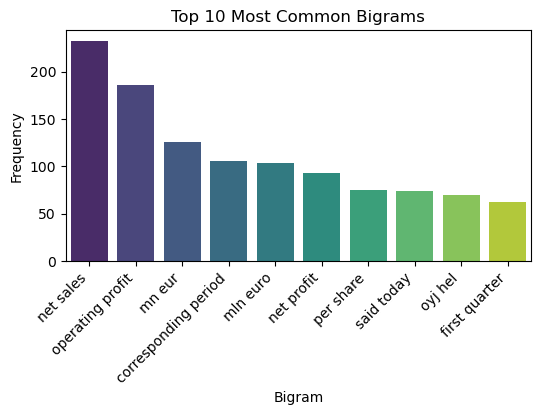

In [23]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequency', y='count', data=common_bigrams.head(10), palette='viridis')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.xticks(rotation=45, ha='right')
plt.show()


TOP 10 TRIGRAMS

In [24]:
from nltk.util import ngrams

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation and char.isalnum() or char.isspace()])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Tokenize and preprocess the sentences into words
df['tokenized_words'] = df['Sentence'].apply(preprocess_text)

# Extract trigrams
df['trigrams'] = df['tokenized_words'].apply(lambda x: list(ngrams(x, 3)))

# Flatten the list of trigrams
all_trigrams = [trigram for sentence_trigrams in df['trigrams'] for trigram in sentence_trigrams]

# Convert the results to a DataFrame for visualization
trigrams_df = pd.DataFrame(all_trigrams, columns=['Word1', 'Word2', 'Word3'])

# Combine the trigrams into a single column for counting
trigrams_df['Word1 Word2 Word3'] = trigrams_df['Word1'] + ' ' + trigrams_df['Word2'] + ' ' + trigrams_df['Word3']

# Display the most common trigrams
common_trigrams = trigrams_df['Word1 Word2 Word3'].value_counts().reset_index().rename(columns={'index': 'Word1 Word2 Word3', 'Word1 Word2 Word3': 'Frequency'})
print(common_trigrams.head(10))


                   Frequency  count
0    mn corresponding period     54
1         earnings per share     33
2              net sales eur     30
3          first nine months     29
4            profit rose eur     27
5              per share eps     27
6             said today net     26
7       operating profit eur     24
8  corresponding period 2005     22
9      operating profit rose     21


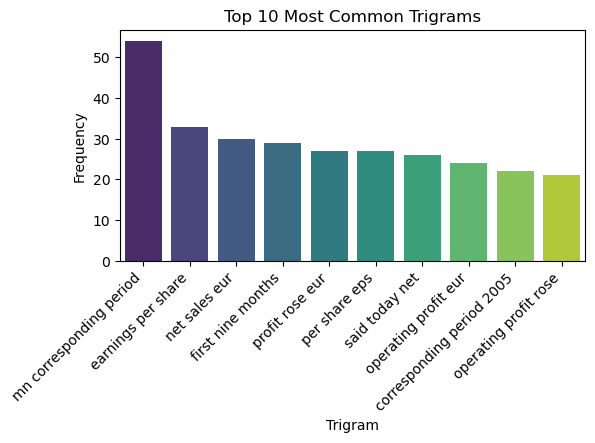

In [25]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequency', y='count', data=common_trigrams.head(10), palette='viridis')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Trigrams')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Creating column "processed_reviewText"

df_final['processed_Sentence'] = df_final['Sentence'].copy()

df_final.head()

,Sentence,Sentiment,processed_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


In [27]:
df_final['processed_Sentence'] = df_final['processed_Sentence'].str.lower()
df_final.head()


,Sentence,Sentiment,processed_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


4. Data Pre-processing

Data pre-processing was done to remove the noise present in data for easier processing of the data by the algorithm.

Pre-processing steps followed :
i. Conversion of the characters into lower case
ii. Removal of Punctuation
iii. Removal of Stopwords
iv. Removal of frequently occuring words
v. Removal of rare words
vi. Stemming
vii. Lemmatization
viii. Removal of emojis
i. Conversion of the characters into Lowercase
Lower casing is a common text pre-processing technique. The idea of conversion of the characters into lowercase is to make all the characters into the same case so that the words like 'review', 'Review', 'REVIEW' are treated in the same way.

This conversion also helps in feature extraction techniques which will come in the later stage of pre-processing. In techniques like TF-IDF, it helps to combine the same words together thereby reducing the duplication and get correct counts or tfidf values.

In [28]:
df_final[['processed_Sentence']]

,processed_Sentence
0,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...
...,...
5837,rising costs have forced packaging producer hu...
5838,nordic walking was first used as a summer trai...
5839,"according shipping company viking line , the e..."
5840,"in the building and home improvement trade , s..."


ii. Removal of Punctuations, URL, HTML TAGS

Our second step in preprocessing is to remove the punctuations from the text data which is a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&'()*+,-./:;<=>?@[\]^_{|}~`

Removal of URL

There also exists some possibility that users will post the link of other products which they find useful while writing a review. Links containing URL will pose an obstacle while processing. The URL was also removed in this step.

e.g. : 'https?://\S+|www.\S+', '',

Removal of HTML Tags

One another common preprocessing technique that will come handy in multiple places is removal of html tags. This is especially useful, if we scrap the data from different websites. We might end up having html strings as part of our text.

e.g. : '<.*?>+', ''

In [29]:
import re

def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    ##df['text'] = df['text'].apply(lambda x: re.sub(r'\$', '', x))
    text = re.sub('\$', '', text)
    text = re.sub('\,', '', text)
    text = re.sub('\.', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [30]:
df_final['processed_Sentence']=df_final['processed_Sentence'].apply(lambda x:review_cleaning(x))
df_final[['processed_Sentence']]

,processed_Sentence
0,the geosolutions technology will leverage bene...
1,esi on lows down to bk a real possibility
2,for the last quarter of componenta 's net sa...
3,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...
...,...
5837,rising costs have forced packaging producer hu...
5838,nordic walking was first used as a summer trai...
5839,according shipping company viking line the eu...
5840,in the building and home improvement trade sa...


iii. Removal of Stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on.As they don't add any valuable information for downstream analysis, they can be removed from the texts. In cases like Part of Speech tagging, we should not remove them as they provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [31]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [32]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_final["processed_Sentence"] = df_final["processed_Sentence"].apply(lambda text: remove_stopwords(text))
df_final[['processed_Sentence']]

,processed_Sentence
0,geosolutions technology leverage benefon 's gp...
1,esi lows bk real possibility
2,last quarter componenta 's net sales doubled p...
3,according finnish-russian chamber commerce maj...
4,swedish buyout firm sold remaining percent sta...
...,...
5837,rising costs forced packaging producer huhtama...
5838,nordic walking first used summer training meth...
5839,according shipping company viking line eu deci...
5840,building home improvement trade sales decrease...


vii. Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) retains in the text.

We have used the WordNetLemmatizer in nltk for the process.

In [33]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_final["processed_Sentence_lemmatized"] = df_final["processed_Sentence"].apply(lambda text: lemmatize_words(text))
df_final[['processed_Sentence_lemmatized']]

,processed_Sentence_lemmatized
0,geosolutions technology leverage benefon 's gp...
1,esi low bk real possibility
2,last quarter componenta 's net sale doubled pe...
3,according finnish-russian chamber commerce maj...
4,swedish buyout firm sold remaining percent sta...
...,...
5837,rising cost forced packaging producer huhtamak...
5838,nordic walking first used summer training meth...
5839,according shipping company viking line eu deci...
5840,building home improvement trade sale decreased...


TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

The sentiment analysis in TextBlob returns a sentiment polarity and subjectivity score for each sentence.

TEXTBLOB APPLICATION

In [34]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [35]:
from textblob import TextBlob


#applying textblob to my dataset
1) converting each sentence to a textblob object.
2) use the 'sentiment' property to get the sentiment polarity and subjectivity.

In [36]:
df_final["predicted_sentiment"] = df_final["processed_Sentence_lemmatized"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classify the sentiment as 'positive', 'neutral', or 'negative'
df_final["predicted_sentiment_label"] = df_final["predicted_sentiment"].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))



In [37]:
#Pickle File
df_final.to_pickle("sentiment_analysis_data.pkl")

This code calculates the sentiment polarity for each lemmatized sentence using TextBlob. The sentiment is then classified into 'positive', 'neutral', or 'negative' based on the polarity score.

In [38]:
#displaying the result

print(df_final[['processed_Sentence', 'processed_Sentence_lemmatized', 'predicted_sentiment', 'predicted_sentiment_label']])


                                     processed_Sentence  \
0     geosolutions technology leverage benefon 's gp...   
1                          esi lows bk real possibility   
2     last quarter componenta 's net sales doubled p...   
3     according finnish-russian chamber commerce maj...   
4     swedish buyout firm sold remaining percent sta...   
...                                                 ...   
5837  rising costs forced packaging producer huhtama...   
5838  nordic walking first used summer training meth...   
5839  according shipping company viking line eu deci...   
5840  building home improvement trade sales decrease...   
5841  helsinki afx - kci konecranes said order four ...   

                          processed_Sentence_lemmatized  predicted_sentiment  \
0     geosolutions technology leverage benefon 's gp...             0.209091   
1                           esi low bk real possibility             0.100000   
2     last quarter componenta 's net sale doubled p

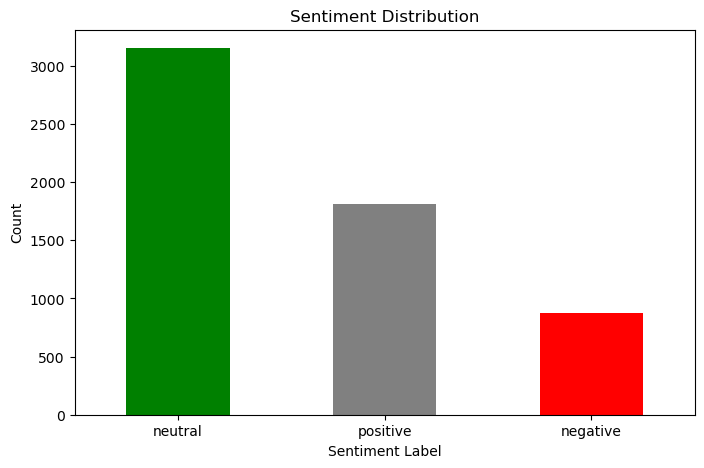

In [39]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df_final['predicted_sentiment_label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


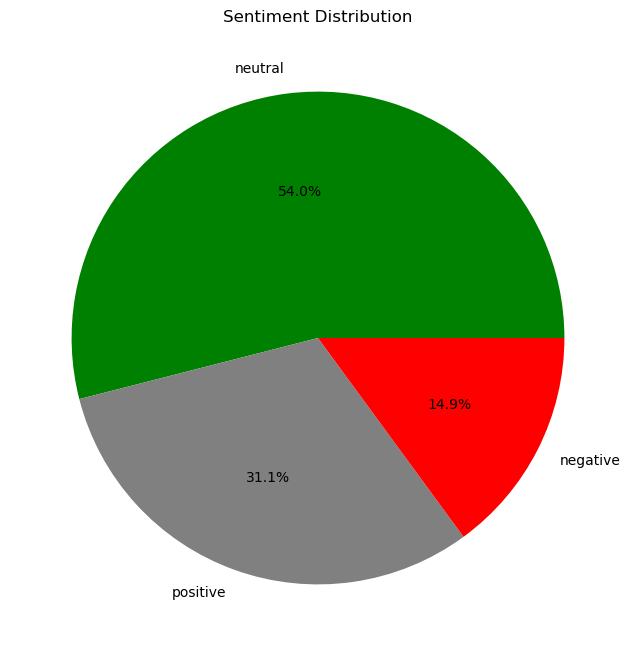

In [40]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()


MODEL BUILDING USING TEXT BLOB TO FIND THE ACCURACY

Define Features (Input) and Target (Output)

Input Feature (X):

processed_Sentence_lemmatized: This is our lemmatized and processed text. we'll use this as the input feature.

Target Variable (y):

predicted_sentiment_label: This is the sentiment label you want to predict. This will be your target variable.

LABEL ENCODING FOR TARGET VARIABLE: THIS WILL CONVERT THE CATEGORICAL LABELS INTO NUMERICAL VALUES

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['encoded_sentiment'] = label_encoder.fit_transform(df_final['predicted_sentiment_label'])


NOW WE HAVE A NEW COLUMN NAMED 'ENCODED_SENTIMENT' THAT WE CAN USE AS OUR TARGET VARIABLE FOR THE CLASSIFICATION MODELS.

"SPLITTING THE DATA INTO TRAIN AND TEST SETS"

In [42]:
from sklearn.model_selection import train_test_split

X = df_final['processed_Sentence_lemmatized']
y = df_final['encoded_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


BUILD AND TRAIN A CLASSIFICATION MODEL

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.40      0.56       180
           1       0.73      0.97      0.83       623
           2       0.84      0.60      0.70       366

    accuracy                           0.77      1169
   macro avg       0.83      0.66      0.70      1169
weighted avg       0.79      0.77      0.75      1169


Confusion Matrix:
[[ 72  82  26]
 [  1 606  16]
 [  5 141 220]]


In [45]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.66


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.89


In [47]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 0.78


MODEL BUILDING USING WORD EMBEDDING TECHNIQUES

In [48]:
# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [50]:
# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [51]:
# Step 4: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

In [52]:
# Step 5: Build and Evaluate Models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [53]:
# Logistic Regression with TF-IDF
logistic_regression_tfidf = LogisticRegression()
evaluate_model(logistic_regression_tfidf, X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded)

# Naive Bayes with TF-IDF
naive_bayes_tfidf = MultinomialNB()
evaluate_model(naive_bayes_tfidf, X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded)

# Random Forest with TF-IDF
random_forest_tfidf = RandomForestClassifier()
evaluate_model(random_forest_tfidf, X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded)

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.16      0.24       175
           1       0.70      0.89      0.79       622
           2       0.75      0.63      0.69       372

    accuracy                           0.70      1169
   macro avg       0.64      0.56      0.57      1169
weighted avg       0.68      0.70      0.67      1169


Confusion Matrix:
[[ 28 110  37]
 [ 24 556  42]
 [  8 128 236]]
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.05      0.10       175
           1       0.66      0.97      0.79       622
           2       0.74      0.48      0.58       372

    accuracy                           0.68      1169
   macro avg       0.74      0.50      0.49      1169
weighted avg       0.71      0.68      0.62      1169


Confusion Matrix:
[[  9 120  46]
 [  1 606  15]
 [  1 194 177]]
Accuracy: 0.66

Classification

In [54]:
# Logistic Regression with Bag of Words
logistic_regression_bow = LogisticRegression()
evaluate_model(logistic_regression_bow, X_train_bow, X_test_bow, y_train_encoded, y_test_encoded)

# Naive Bayes with Bag of Words
naive_bayes_bow = MultinomialNB()
evaluate_model(naive_bayes_bow, X_train_bow, X_test_bow, y_train_encoded, y_test_encoded)

# Random Forest with Bag of Words
random_forest_bow = RandomForestClassifier()
evaluate_model(random_forest_bow, X_train_bow, X_test_bow, y_train_encoded, y_test_encoded)

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.22      0.26       175
           1       0.71      0.79      0.75       622
           2       0.74      0.70      0.72       372

    accuracy                           0.68      1169
   macro avg       0.59      0.57      0.58      1169
weighted avg       0.66      0.68      0.67      1169


Confusion Matrix:
[[ 39 105  31]
 [ 70 493  59]
 [ 17  93 262]]
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       175
           1       0.76      0.80      0.78       622
           2       0.69      0.66      0.68       372

    accuracy                           0.69      1169
   macro avg       0.61      0.60      0.61      1169
weighted avg       0.68      0.69      0.68      1169


Confusion Matrix:
[[ 61  67  47]
 [ 62 497  63]
 [ 32  93 247]]
Accuracy: 0.65

Classification

In [55]:
#TF-IDF

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: TF-IDF Vectorization (or you can use CountVectorizer if you have a single feature)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Build and Evaluate Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth=30, random_state=42)
decision_tree.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model
y_pred = decision_tree.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))




Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.23      0.29       175
           1       0.65      0.88      0.75       622
           2       0.80      0.45      0.57       372

    accuracy                           0.65      1169
   macro avg       0.61      0.52      0.54      1169
weighted avg       0.65      0.65      0.62      1169


Confusion Matrix:
[[ 41 118  16]
 [ 47 549  26]
 [ 21 184 167]]


In [56]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],  
    'random_state': [5, 10, 15, 20, 25, 30,42] 
}

# Create the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train_tfidf, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_decision_tree = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_decision_tree.predict(X_test_tfidf)

accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

print("\nClassification Report (Best Model):")
print(classification_report(y_test_encoded, y_pred_best))

print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test_encoded, y_pred_best))


Best Hyperparameters: {'max_depth': 25, 'random_state': 5}
Best Model Accuracy: 0.64

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.36      0.21      0.27       175
           1       0.64      0.88      0.74       622
           2       0.81      0.44      0.57       372

    accuracy                           0.64      1169
   macro avg       0.60      0.51      0.53      1169
weighted avg       0.65      0.64      0.62      1169


Confusion Matrix (Best Model):
[[ 37 123  15]
 [ 48 550  24]
 [ 17 191 164]]


In [57]:
#AFTER GRID SEARCH CV

# Step 4: Build and Evaluate Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth=25, random_state=5)
decision_tree.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model
y_pred = decision_tree.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))




Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.21      0.27       175
           1       0.64      0.88      0.74       622
           2       0.81      0.44      0.57       372

    accuracy                           0.64      1169
   macro avg       0.60      0.51      0.53      1169
weighted avg       0.65      0.64      0.62      1169


Confusion Matrix:
[[ 37 123  15]
 [ 48 550  24]
 [ 17 191 164]]


In [58]:
#BOW

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 4: Build and Evaluate Decision Tree Model
decision_tree_bow = DecisionTreeClassifier(max_depth=30, random_state=42)
decision_tree_bow.fit(X_train_bow, y_train_encoded)

# Evaluate the model
y_pred_bow = decision_tree_bow.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test_encoded, y_pred_bow)
print(f"Accuracy (Bag of Words): {accuracy_bow:.2f}")

print("\nClassification Report (Bag of Words):")
print(classification_report(y_test_encoded, y_pred_bow))

print("\nConfusion Matrix (Bag of Words):")
print(confusion_matrix(y_test_encoded, y_pred_bow))


Accuracy (Bag of Words): 0.65

Classification Report (Bag of Words):
              precision    recall  f1-score   support

           0       0.33      0.14      0.20       175
           1       0.64      0.89      0.75       622
           2       0.79      0.49      0.60       372

    accuracy                           0.65      1169
   macro avg       0.59      0.51      0.52      1169
weighted avg       0.64      0.65      0.62      1169


Confusion Matrix (Bag of Words):
[[ 25 127  23]
 [ 41 554  27]
 [ 10 179 183]]


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 4: Hyperparameter Tuning with Grid Search
param_grid = {
   'max_depth': [5, 10, 15, 20, 25, 30],  
    'random_state': [5, 10, 15, 20, 25, 30,42],
}

# Create the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train_bow, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_decision_tree_bow = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_bow = best_decision_tree_bow.predict(X_test_bow)

accuracy_best_bow = accuracy_score(y_test_encoded, y_pred_best_bow)
print(f"Best Model Accuracy (Bag of Words): {accuracy_best_bow:.2f}")

print("\nClassification Report (Best Model - Bag of Words):")
print(classification_report(y_test_encoded, y_pred_best_bow))

print("\nConfusion Matrix (Best Model - Bag of Words):")
print(confusion_matrix(y_test_encoded, y_pred_best_bow))


Best Hyperparameters: {'max_depth': 30, 'random_state': 42}
Best Model Accuracy (Bag of Words): 0.65

Classification Report (Best Model - Bag of Words):
              precision    recall  f1-score   support

           0       0.33      0.14      0.20       175
           1       0.64      0.89      0.75       622
           2       0.79      0.49      0.60       372

    accuracy                           0.65      1169
   macro avg       0.59      0.51      0.52      1169
weighted avg       0.64      0.65      0.62      1169


Confusion Matrix (Best Model - Bag of Words):
[[ 25 127  23]
 [ 41 554  27]
 [ 10 179 183]]


In [60]:
##ADA boosting for BOW

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 4: Build and Evaluate AdaBoost Model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train_bow, y_train_encoded)

# Evaluate the model
y_pred_adaboost = adaboost.predict(X_test_bow)

accuracy_adaboost = accuracy_score(y_test_encoded, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")

print("\nClassification Report (AdaBoost):")
print(classification_report(y_test_encoded, y_pred_adaboost))

print("\nConfusion Matrix (AdaBoost):")
print(confusion_matrix(y_test_encoded, y_pred_adaboost))


AdaBoost Accuracy: 0.65

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.42      0.24      0.31       175
           1       0.64      0.90      0.75       622
           2       0.80      0.43      0.56       372

    accuracy                           0.65      1169
   macro avg       0.62      0.52      0.54      1169
weighted avg       0.66      0.65      0.62      1169


Confusion Matrix (AdaBoost):
[[ 42 119  14]
 [ 35 561  26]
 [ 22 191 159]]


In [61]:
##gradient boosting for BOW

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 4: Build and Evaluate Gradient Boosting Model
gradient_boosting = GradientBoostingClassifier(n_estimators=400, random_state=42)
gradient_boosting.fit(X_train_bow, y_train_encoded)

# Evaluate the model
y_pred_gb = gradient_boosting.predict(X_test_bow)

accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test_encoded, y_pred_gb))

print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test_encoded, y_pred_gb))


Gradient Boosting Accuracy: 0.68

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.33      0.19      0.24       175
           1       0.68      0.86      0.76       622
           2       0.79      0.60      0.68       372

    accuracy                           0.68      1169
   macro avg       0.60      0.55      0.56      1169
weighted avg       0.66      0.68      0.66      1169


Confusion Matrix (Gradient Boosting):
[[ 33 116  26]
 [ 54 535  33]
 [ 12 137 223]]


In [62]:
pip install xgboost


In [63]:
#XG gradient boosting for bOW

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 4: Build and Evaluate XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.1,random_state=42)
xgb_model.fit(X_train_bow, y_train_encoded)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_bow)

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test_encoded, y_pred_xgb))

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test_encoded, y_pred_xgb))


XGBoost Accuracy: 0.68

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.35      0.16      0.22       175
           1       0.68      0.87      0.76       622
           2       0.77      0.60      0.67       372

    accuracy                           0.68      1169
   macro avg       0.60      0.54      0.55      1169
weighted avg       0.66      0.68      0.65      1169


Confusion Matrix (XGBoost):
[[ 28 118  29]
 [ 44 540  38]
 [  9 140 223]]


In [64]:
#XGgradient boosting for TF-IDF

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: TF-IDF Vectorization (TF-IDFVectorizer)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Build and Evaluate XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_tfidf)

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test_encoded, y_pred_xgb))

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test_encoded, y_pred_xgb))


XGBoost Accuracy: 0.66

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.28      0.15      0.19       175
           1       0.68      0.85      0.75       622
           2       0.75      0.60      0.67       372

    accuracy                           0.66      1169
   macro avg       0.57      0.53      0.54      1169
weighted avg       0.64      0.66      0.64      1169


Confusion Matrix (XGBoost):
[[ 26 117  32]
 [ 52 528  42]
 [ 15 134 223]]


In [65]:
#gradient boosting for TF-IDF

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Build and Evaluate Gradient Boosting Model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model
y_pred_gb = gradient_boosting.predict(X_test_tfidf)

accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test_encoded, y_pred_gb))

print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test_encoded, y_pred_gb))


Gradient Boosting Accuracy: 0.66

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.43      0.15      0.22       175
           1       0.64      0.91      0.75       622
           2       0.79      0.48      0.60       372

    accuracy                           0.66      1169
   macro avg       0.62      0.51      0.52      1169
weighted avg       0.66      0.66      0.62      1169


Confusion Matrix (Gradient Boosting):
[[ 26 131  18]
 [ 25 568  29]
 [ 10 184 178]]


In [66]:
#ADABOOST FOR TF-IDF

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Bag of Words Vectorization (CountVectorizer)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Build and Evaluate AdaBoost Model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model
y_pred_adaboost = adaboost.predict(X_test_tfidf)

accuracy_adaboost = accuracy_score(y_test_encoded, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")

print("\nClassification Report (AdaBoost):")
print(classification_report(y_test_encoded, y_pred_adaboost))

print("\nConfusion Matrix (AdaBoost):")
print(confusion_matrix(y_test_encoded, y_pred_adaboost))


AdaBoost Accuracy: 0.65

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.44      0.29      0.35       175
           1       0.64      0.89      0.74       622
           2       0.81      0.40      0.54       372

    accuracy                           0.65      1169
   macro avg       0.63      0.53      0.54      1169
weighted avg       0.66      0.65      0.62      1169


Confusion Matrix (AdaBoost):
[[ 51 114  10]
 [ 42 555  25]
 [ 22 200 150]]


In [67]:
pip install imbalanced-learn


In [68]:
#main code

from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

seed = 66

# Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']
print(sorted(Counter(y).items()))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33,
    random_state=seed
)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Using SMOTE in a pipeline with RandomForestClassifier
smote_pipeline = make_pipeline(TfidfVectorizer(), SMOTE(random_state=seed), RandomForestClassifier(random_state=seed))

print(sorted(Counter(y_train).items()))

# Fit the model and evaluate
smote_pipeline.fit(X_train, y_train)
accuracy = smote_pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


[('negative', 860), ('neutral', 3130), ('positive', 1852)]
[('negative', 592), ('neutral', 2087), ('positive', 1235)]
Accuracy: 0.65


In [69]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

seed = 66

# Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']
print(sorted(Counter(y).items()))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33,
    random_state=seed
)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Feature Scaling (Optional but can help with convergence)
scaler = StandardScaler(with_mean=False)  # Sparse matrix, so don't center the data
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)

# Using SMOTE in a pipeline with Logistic Regression
smote_pipeline = make_pipeline(TfidfVectorizer(), SMOTE(random_state=seed), LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=seed))

print(sorted(Counter(y_train).items()))

# Fit the model and evaluate
smote_pipeline.fit(X_train, y_train)
y_pred = smote_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[('negative', 860), ('neutral', 3130), ('positive', 1852)]
[('negative', 592), ('neutral', 2087), ('positive', 1235)]
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

    negative       0.37      0.50      0.42       268
     neutral       0.78      0.73      0.75      1043
    positive       0.71      0.67      0.69       617

    accuracy                           0.68      1928
   macro avg       0.62      0.63      0.62      1928
weighted avg       0.70      0.68      0.69      1928


Confusion Matrix:
[[134  80  54]
 [169 758 116]
 [ 62 140 415]]


In [70]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

seed = 66

# Load your dataset (assuming df_final is your DataFrame)

# Train-Test Split
X = df_final['processed_Sentence_lemmatized']
y = df_final['Sentiment']

# Counter before any resampling
print("Counter before resampling:", sorted(Counter(y).items()))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33,
    random_state=seed,
    stratify=y  # Ensure stratified split for imbalanced classes
)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Using SMOTETomek in a pipeline with Logistic Regression
smotetomek_pipeline = make_pipeline(TfidfVectorizer(), SMOTETomek(random_state=seed), LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=seed))

# Using SMOTEENN in a pipeline with Logistic Regression
smoteenn_pipeline = make_pipeline(TfidfVectorizer(), SMOTEENN(random_state=seed), LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=seed))

# Counter before resampling
print("Counter before SMOTETomek:", sorted(Counter(y_train_encoded).items()))

# Stratified K-Fold Cross-Validation for SMOTETomek
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cv_scores_smt = cross_val_score(smotetomek_pipeline, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores (SMOTETomek):", cv_scores_smt)
print("Mean Accuracy (SMOTETomek):", cv_scores_smt.mean())

# Fit the SMOTETomek model and evaluate on the test set
smotetomek_pipeline.fit(X_train, y_train_encoded)
y_pred_smt = smotetomek_pipeline.predict(X_test)

# Counter after applying SMOTETomek
print("Counter after SMOTETomek:", sorted(Counter(y_pred_smt).items()))

accuracy_smt = accuracy_score(y_test_encoded, y_pred_smt)
print(f"\nAccuracy on Test Set (SMOTETomek): {accuracy_smt:.2f}")

print("\nClassification Report (SMOTETomek):")
print(classification_report(y_test_encoded, y_pred_smt))

print("\nConfusion Matrix (SMOTETomek):")
print(confusion_matrix(y_test_encoded, y_pred_smt))

# Counter before resampling
print("Counter before SMOTEENN:", sorted(Counter(y_train_encoded).items()))

# Stratified K-Fold Cross-Validation for SMOTEENN
cv_scores_senn = cross_val_score(smoteenn_pipeline, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("\nCross-Validation Scores (SMOTEENN):", cv_scores_senn)
print("Mean Accuracy (SMOTEENN):", cv_scores_senn.mean())

# Fit the SMOTEENN model and evaluate on the test set
smoteenn_pipeline.fit(X_train, y_train_encoded)
y_pred_senn = smoteenn_pipeline.predict(X_test)

# Counter after applying SMOTEENN
print("Counter after SMOTEENN:", sorted(Counter(y_pred_senn).items()))

accuracy_senn = accuracy_score(y_test_encoded, y_pred_senn)
print(f"\nAccuracy on Test Set (SMOTEENN): {accuracy_senn:.2f}")

print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test_encoded, y_pred_senn))

print("\nConfusion Matrix (SMOTEENN):")
print(confusion_matrix(y_test_encoded, y_pred_senn))


Counter before resampling: [('negative', 860), ('neutral', 3130), ('positive', 1852)]
Counter before SMOTETomek: [(0, 576), (1, 2097), (2, 1241)]
Cross-Validation Scores (SMOTETomek): [0.66666667 0.69093231 0.66794381 0.68326948 0.67007673]
Mean Accuracy (SMOTETomek): 0.675777797375822
Counter after SMOTETomek: [(0, 372), (1, 1014), (2, 542)]

Accuracy on Test Set (SMOTETomek): 0.68

Classification Report (SMOTETomek):
              precision    recall  f1-score   support

           0       0.40      0.52      0.45       284
           1       0.75      0.74      0.75      1033
           2       0.73      0.65      0.69       611

    accuracy                           0.68      1928
   macro avg       0.63      0.64      0.63      1928
weighted avg       0.69      0.68      0.68      1928


Confusion Matrix (SMOTETomek):
[[149  92  43]
 [166 764 103]
 [ 57 158 396]]
Counter before SMOTEENN: [(0, 576), (1, 2097), (2, 1241)]

Cross-Validation Scores (SMOTEENN): [0.27586207 0.28097063 